In [208]:
import time
import email

import os; 
from os import listdir
from os.path import join, isdir

import pandas as pd
import swifter

import matplotlib.pyplot as plt

path = "/media/becode/3D_House/Enron_CSV/"

In [40]:
data = pd.read_csv("/media/becode/3D_House/Enron_CSV/reduced_mails_FINAL.csv", index_col=0)

In [114]:
data["Date"] = data["Date"].swifter.apply(pd.to_datetime)

In [115]:
data[data["Date"].apply(lambda x: x.year < 1985)]

,Content,Date,From,To,Subject,X-Folder,Words,VecSum,Author
254413,attached is the systems wish list for the gas ...,1979-12-31 16:00:00,phillip.allen@enron.com,"john.lavorato@enron.com, beth.perlman@enron.co...",systems wish list,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"['attached', 'systems', 'wish', 'list', 'gas',...",-2.841491,allen-p
254434,EOL report for TV in conference on 33\n\n\nCas...,1979-12-31 16:00:00,phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",NaN,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,"['EOL', 'report', 'TV', 'conference', '33', 'C...",-2.765434,allen-p
254628,"George,\n\nIn response to your ideas\n\nTime a...",1979-12-31 16:00:00,phillip.allen@enron.com,c@enron.com,NaN,\Phillip_Allen_June2001\Notes Folders\Discussi...,"['George', 'In', 'response', 'ideas', 'Time', ...",41.175362,allen-p
256137,"Scott,\n\n Thanks for the email. I have two q...",1979-12-31 16:00:00,phillip.allen@enron.com,scott.tholan@enron.com,Re: Carlsbad/El Paso: Aug 23 Update: Press Con...,\Phillip_Allen_June2001\Notes Folders\All docu...,"['Scott', 'Thanks', 'email', 'I', 'two', 'ques...",5.813128,allen-p
256309,"Mary,\n\n It is OK to buy a carpet shampooer.\...",1979-12-31 16:00:00,phillip.allen@enron.com,maryrichards7@hotmail.com,Re:,\Phillip_Allen_Dec2000\Notes Folders\All docum...,"['Mary', 'It', 'OK', 'buy', 'carpet', 'shampoo...",-4.032309,allen-p
...,...,...,...,...,...,...,...,...,...
104682,"Andrew -\n\nThanks for your kind words, my fri...",1979-12-31 16:00:00,jason.williams@enron.com,thedolan@yahoo.com,Re: Bliss,\Jason_Williams_Nov2001\Notes Folders\Discussi...,"['Andrew', 'Thanks', 'kind', 'words', 'friend'...",92.341400,williams-j
104691,All -\n\nAttached is an ISDA worksheet for a n...,1979-12-31 16:00:00,jason.williams@enron.com,"susan.bailey@enron.com, samantha.boyd@enron.co...","Praxair, Inc.",\Jason_Williams_Nov2001\Notes Folders\Discussi...,"['All', 'Attached', 'ISDA', 'worksheet', 'new'...",9.796606,williams-j
105685,"Saturday, March 18th.\n\n\n\n\nWayne_Kearney@a...",1979-12-31 16:00:00,jason.williams@enron.com,wayne_kearney@ars.aon.com,Re: March 18th,\Jason_Williams_Nov2001\Notes Folders\All docu...,"['Saturday', 'March', '18th', 'Wayne_Kearney',...",126.296967,williams-j
105699,Yo Dr. Ake -\n\nI WENT AND GOT MEASURED LAST N...,1979-12-31 16:00:00,jason.williams@enron.com,drake.borer@utsouthwestern.edu,Re: YOU KNOW WHAT,\Jason_Williams_Nov2001\Notes Folders\All docu...,"['Yo', 'Dr', 'Ake', 'I', 'WENT', 'AND', 'GOT',...",-53.962639,williams-j


# Features

In [102]:
features = pd.DataFrame(data["Author"].unique(), columns=["Author"])

In [105]:
features["First"] = features["Author"].apply(lambda x: data[data["Author"]==x]["Date"].min())
features["Last"] = features["Author"].apply(lambda x: data[data["Author"]==x]["Date"].max())

In [108]:
features["Count"] = features["Author"].apply(lambda x: len(data[data["Author"]==x]))

In [130]:
blacklist_years = [1979, 2004, 2044, 2020, 2012, 1986, 2043, 2024, 2007, 2005]

In [133]:
data.drop(data[data["Date"].apply(lambda x: x.year in blacklist_years)].index, inplace=True)

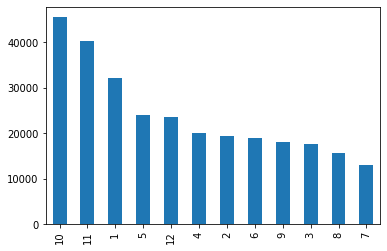

In [142]:
data["Date"].apply(lambda x:x.month).value_counts().plot(kind="bar")

In [182]:
#get_emotions = lambda x: NRCLex(x).affect_frequencies
get_emotions = lambda x: pd.Series(
    [NRCLex(x).affect_frequencies, NRCLex(x).top_emotions[0][0]],
    index=["Emotions", "Top_emote"]
)

In [183]:
len(data["Content"].iloc[:100])

100

In [195]:
test = pd.DataFrame()
test["Content"] = data["Content"].iloc[:100]
test[["Emotions", "Top_emote"]] = test["Content"].swifter.apply(get_emotions)

In [210]:
from nrclex import NRCLex

emotion_keys=[
    'fear', 'anger', 'anticip', 
    'trust', 'surprise', 'positive', 
    'negative', 'sadness', 'disgust', 
    'joy', 'topemotion'
]

def read_emotions(x):
    text_object = NRCLex(x)  
    
    result = [
        text_object.affect_frequencies[key]
        for key in emotion_keys[:-1]
    ]
    result.append(text_object.top_emotions[0][0])
    return pd.Series(result, index=emotion_keys)

emotions = pd.DataFrame(
    data[["Words", "Author", "Date"]],
    columns=["Words", "Author", "Date"])

emotions[emotion_keys] = emotions["Words"].swifter.apply(read_emotions)

In [211]:
emotions.to_csv(join(path, "emotional_words.csv"))

In [ ]:
emotions